In [43]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
#payoff matrix 
A = np.array([[3, 0], [5, 1]])

def stationary(strat1, strat2):
    p1, q1 = strat1
    p2, q2 = strat2
    r1, r2 = p1 - q1, p2 - q2
    s1 = (q2*r1 + q1)/(1 - r1*r2)
    s2 = (q1*r2 + q2)/(1 - r1*r2)
    stat = [s1*s2, s1*(1 - s2), s2*(1 - s1), (1 - s1)*(1 - s2)]
    return stat

N = 100
p = 0.35

G = nx.erdos_renyi_graph(N, p)
lstrat = np.random.uniform(size=(N, 2))

def graph_mc(G, lstrat, alpha):
    i = np.random.choice(N)
    new_strat = np.random.uniform(size=2)
    prev_payoffs = []
    new_payoffs = []
    for nhb in G.neighbors(i):
        prev_stat = stationary(lstrat[i], lstrat[nhb])
        new_stat = stationary(new_strat, lstrat[nhb])
        prev_payoffs.append(np.dot(A.reshape(-1), prev_stat))
        new_payoffs.append(np.dot(A.reshape(-1), new_stat))    
    if np.mean(new_payoffs) > np.mean(prev_payoffs):
        lstrat[i] = new_strat
    return lstrat

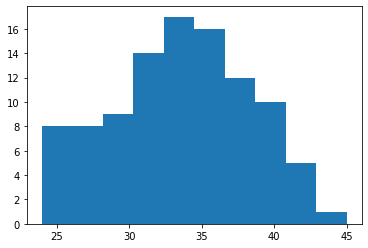

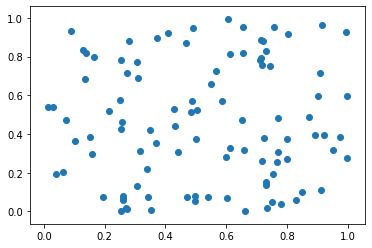

In [68]:
plt.hist([d for n, d in G.degree()])
plt.show()
plt.scatter(lstrat[:, 0], lstrat[:, 1])
plt.show()

In [73]:
avg_strats = []
for _ in tqdm_notebook(range(10000)):
    lstrat = graph_mc(G, lstrat, 0)
    avg_strats.append(np.mean(lstrat, axis=0))

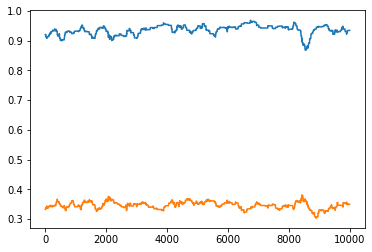

In [74]:
plt.plot(avg_strats)

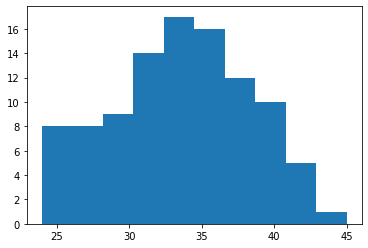

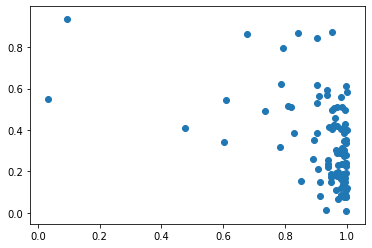

In [70]:
plt.hist([d for n, d in G.degree()])
plt.show()
plt.scatter(lstrat[:, 0], lstrat[:, 1])
plt.show()

In [209]:
from netevolution import *
x = GraphEvo(100, 0.3, np.array([3., 0., 5, 1]))

In [210]:
for _ in tqdm_notebook(range(2000000)):
    x.mc_step_edge(1)

<string>:3: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, C))


ValueError: empty range for randrange()

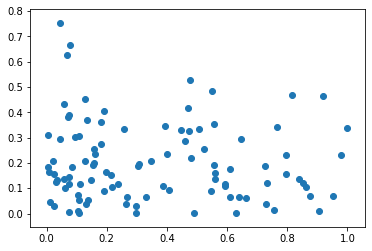

In [186]:
plt.scatter(x.strategies[:, 0], x.strategies[:, 1])

In [199]:
G = nx.from_numpy_array(x.G)

In [204]:
x = {1, 2, 3}
4 in x

False